## 3. iShares Core U.S. Aggregate Bond ETF (AGG) Analysis - Low Risk (Bond Fund)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from matplotlib.ticker import FuncFormatter # Import FuncFormatter

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 4)
warnings.filterwarnings('ignore') 

In [2]:
input_data_folder = '../Cleaned_Exports'

adj_close_filename = 'aligned_adj_close_prices.csv'
returns_filename = 'calculated_monthly_returns.csv'

adj_close_filepath = os.path.join(input_data_folder, adj_close_filename)
returns_filepath = os.path.join(input_data_folder, returns_filename)

adj_close_df = pd.read_csv(adj_close_filepath, index_col='Date', parse_dates=True)
monthly_returns = pd.read_csv(returns_filepath, index_col='Date', parse_dates=True)

print("\nData loaded successfully.")
print(f"Price data shape: {adj_close_df.shape}")
print(f"Return data shape: {monthly_returns.shape}")


Data loaded successfully.
Price data shape: (52, 4)
Return data shape: (51, 4)


In [3]:
# Calculate rolling volatility based on loaded monthly returns
if 'monthly_returns' in locals() and not monthly_returns.empty:
    rolling_window = 12 # Define rolling window size
    rolling_std = monthly_returns.rolling(window=rolling_window).std()
    annualized_rolling_volatility = rolling_std * np.sqrt(12)
    print(f"\nCalculated {rolling_window}-Month Annualized Rolling Volatility.")
else:
    print("\nSkipping rolling volatility calculation as monthly returns data is not available.")
    # Assign an empty DataFrame or None if returns weren't loaded
    annualized_rolling_volatility = pd.DataFrame()


Calculated 12-Month Annualized Rolling Volatility.


###  AGG - Price Trend

--- AGG Price Analysis ---


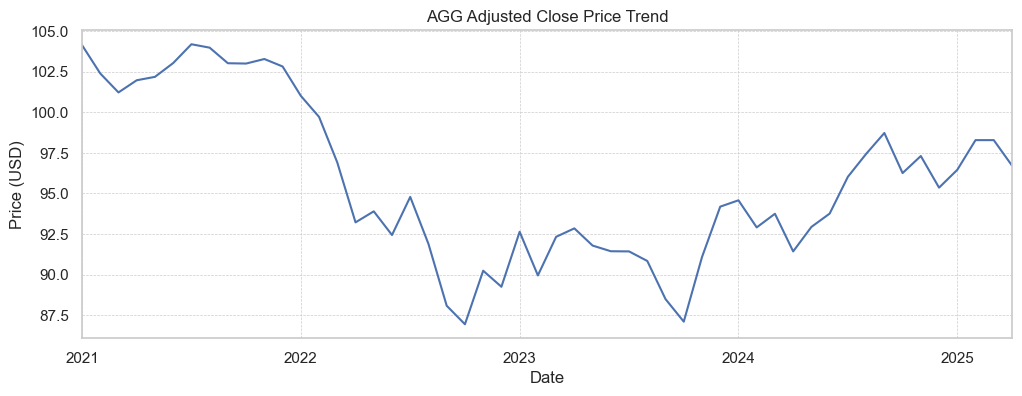

In [5]:
asset_ticker = 'AGG'
print(f"--- {asset_ticker} Price Analysis ---")

if asset_ticker in adj_close_df.columns:
    plt.figure()
    adj_close_df[asset_ticker].plot()
    plt.title(f'{asset_ticker} Adjusted Close Price Trend')
    plt.ylabel('Price (USD)')
    plt.xlabel('Date')
    plt.grid(True, ls='--', linewidth=0.5)
    plt.show()
else:
    print(f"{asset_ticker} price data not found.")

#### Interpretation: AGG Price Trend

The price trend for the AGG ETF (U.S. Aggregate Bond Market) reflects the typical behaviour of broad bond market investments, particularly during a period of shifting interest rates.

1.  **Moderate Volatility:** Compared to the high-risk assets (TSLA, BTC-USD), the price movement of AGG is considerably smoother, although it clearly exhibits more fluctuation than the ultra-low-risk BIL ETF.
2.  **Significant Downtrend (Interest Rate Impact):** The most prominent feature is the significant decline in price starting in late 2021 and extending through most of 2022, reaching a low point below 90 dollars. This period directly corresponds to the Federal Reserve's aggressive interest rate hikes aimed at curbing inflation. As interest rates rise, the value of existing bonds with lower yields typically falls, which is reflected in the ETF's price decrease.
3.  **Partial Recovery:** From the low point in late 2022/early 2023, the ETF shows a general recovery trend through 2024 and into early 2025, ending the period around 97.5 dollars. This likely reflects market stabilization and potentially changing expectations regarding future interest rate movements.
4.  **Overall Performance:** Despite the recovery, the ETF ended the period significantly below its starting price (which was above 102.5 dollars), consistent with the negative overall return calculated earlier for this asset during this timeframe.

This chart illustrates that while AGG is less volatile than equities or crypto, it is not immune to significant price declines, especially in a rising interest rate environment. It represents a moderate level of risk within the fixed-income spectrum.

### AGG - Return Analysis

--- AGG Return Analysis ---


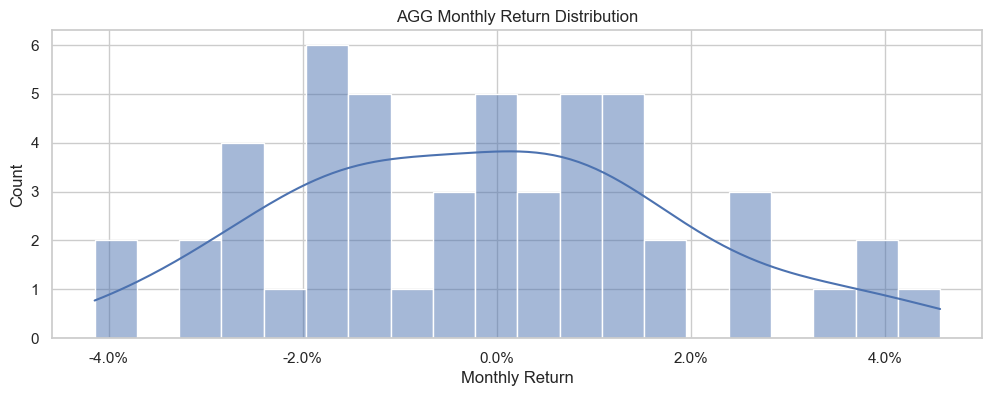


AGG Monthly Return Statistics:
count   51.0000
mean    -0.0013
std      0.0202
min     -0.0415
25%     -0.0158
50%     -0.0002
75%      0.0111
max      0.0457


In [7]:
asset_ticker = 'AGG'
print(f"--- {asset_ticker} Return Analysis ---")

if asset_ticker in monthly_returns.columns:
    # Distribution Plot
    plt.figure()
    sns.histplot(monthly_returns[asset_ticker], kde=True, bins=20)
    plt.title(f'{asset_ticker} Monthly Return Distribution')
    plt.xlabel('Monthly Return')
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.1%}'.format(x)))
    plt.show()

    # Descriptive Statistics
    print(f"\n{asset_ticker} Monthly Return Statistics:")
    try:
        print(monthly_returns[asset_ticker].describe().to_string(float_format='{:.4f}'.format))
    except Exception as e:
        print(f"Could not calculate describe() stats for {asset_ticker}: {e}")
else:
    print(f"{asset_ticker} return data not found.")

#### Interpretation: AGG Return Analysis

This analysis reviews the monthly percentage returns for the AGG Aggregate Bond ETF.

1.  **Distribution Shape and Spread:** The histogram displays a relatively narrow distribution compared to high-risk assets like TSLA and BTC-USD, indicating lower volatility. The returns are largely clustered around the 0% mark, spanning roughly from -4% to +4%.
2.  **Statistical Summary:**
    *   **Mean and Median:** The average monthly return (`mean`) was slightly negative at -0.13%, consistent with the overall price decline observed during parts of the period. The median return (`50%`) was also very close to zero at -0.02%. This shows that typical monthly performance was nearly flat to slightly negative.
    *   **Volatility (Standard Deviation):** The monthly standard deviation (`std`) is 2.02%. This value is significantly lower than the ~18% seen for TSLA and BTC-USD but considerably higher than the ~0.3% for BIL, confirming AGG's position as a low-to-moderate risk asset.
    *   **Range (Min/Max):** The most extreme monthly outcomes were a loss of 4.15% (`min`) and a gain of 4.57% (`max`). While these represent noticeable monthly movements, the range is much tighter than that of the high-risk assets.

Overall, the return distribution and statistics for AGG show relatively low volatility compared to stocks and crypto, but demonstrate that even diversified bond funds can experience negative returns and moderate monthly fluctuations, especially driven by factors like interest rate changes.

### AGG - Rolling Volatility Analysis

--- AGG Rolling Volatility Analysis ---


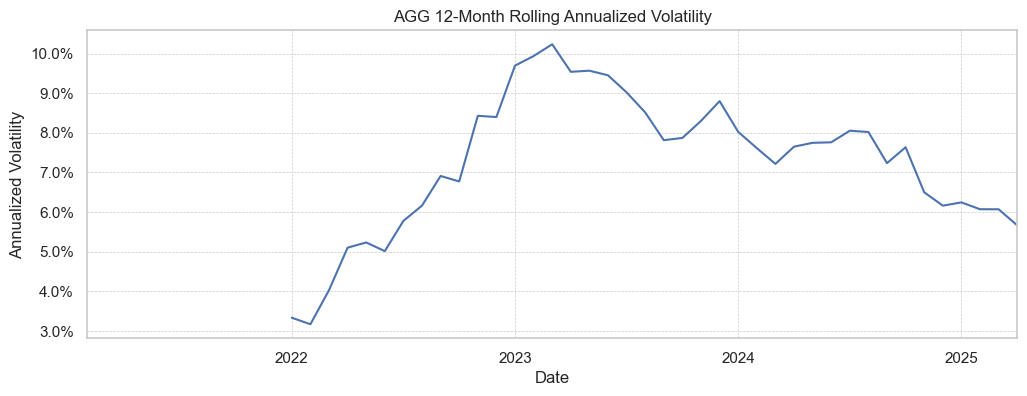

In [8]:
asset_ticker = 'AGG'
print(f"--- {asset_ticker} Rolling Volatility Analysis ---")

if 'annualized_rolling_volatility' in locals() and not annualized_rolling_volatility.empty and asset_ticker in annualized_rolling_volatility.columns:
    plt.figure()
    annualized_rolling_volatility[asset_ticker].plot()
    plt.title(f'{asset_ticker} {rolling_window}-Month Rolling Annualized Volatility')
    plt.ylabel('Annualized Volatility')
    plt.xlabel('Date')
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
    plt.grid(True, ls='--', linewidth=0.5)
    plt.show()
else:
    print(f"{asset_ticker} rolling volatility data not found or could not be calculated.")

#### Interpretation: AGG Rolling Volatility

This plot displays the 12-month rolling annualized volatility for the AGG bond ETF, providing insight into how its risk profile changed over time.

*   **Note on Start Date:** The chart begins in early 2022 (specifically, the first data point corresponds to Dec 2021) because the calculation requires a full 12 months of preceding return data. Data prior to Jan 2021 was not available for this analysis, so the rolling calculation could only start producing valid results after the first 12 months of the dataset had passed.

1.  **Relatively Low but Variable Risk:** While AGG's volatility consistently remained far below that of TSLA and BTC-USD, it was not static and clearly exceeded the near-zero volatility of BIL. The annualized volatility ranged roughly between 3% and just over 10%.
2.  **Volatility Increase During Rate Hikes:** There is a distinct and significant increase in rolling volatility throughout 2022, peaking above 10% in early 2023. This period aligns directly with the Federal Reserve's rapid interest rate increases, which introduced significant uncertainty and price fluctuations into the usually more stable bond market.
3.  **Subsequent Moderation:** Following the peak in early 2023, AGG's rolling volatility generally trended downwards throughout 2023 and 2024, stabilizing in the 6%-8% range towards the end of the period. This suggests a return to more typical, albeit still elevated compared to pre-2022 levels, bond market volatility as the pace of rate hikes slowed.

This dynamic view shows that even diversified bond funds like AGG can experience considerable changes in their risk profile, particularly driven by shifts in the macroeconomic environment and interest rate policy. However, its absolute level of risk remained firmly in the low-to-moderate category compared to the high-risk assets.

## **Conclusion for AGG:**


AGG exhibited clear patterns between 2021 and 2025, notably a significant price decline during the period of rising interest rates, followed by a partial recovery. Its risk profile was identified as **low-to-moderate**, with rolling volatility climbing above 10% amidst rate uncertainty before later moderating. However, as AGG generated a negative average return over this specific timeframe, it resulted in a capital loss for holders. Therefore, based purely on performance during this analyzed period, it proved **not to be beneficial** from a return perspective.